<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S11_C4_Intro_CNN_CF10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompa

In [1]:
import keras
print(keras.__version__)

3.7.0


In [2]:
import tensorflow as tf
import numpy as no
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10 as cf10

In [3]:
(train_images, train_labels) , ( test_images, test_labels) = cf10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


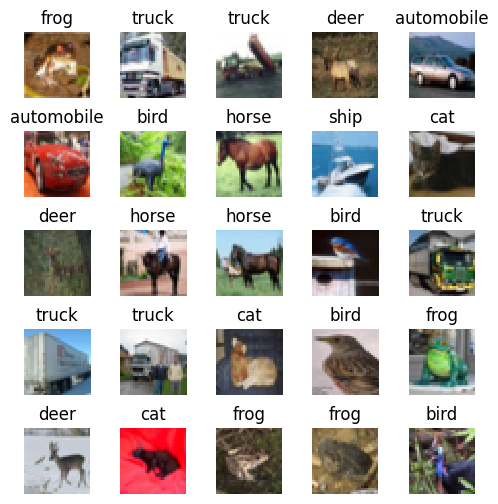

In [4]:
# initialize the label names for the CIFAR-10 dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]
num_classes = len(class_names)

n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[train_labels[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [5]:
import tensorflow as tf
import keras

In [6]:

import numpy as np
import matplotlib.pyplot as plt

In [7]:

from tensorflow.keras.datasets import cifar10 as cf10

In [8]:
(train_images, train_labels) , ( test_images, test_labels) = cf10.load_data()


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D

Experimento 1
VGG1
32 filtros de 3*3

In [10]:
model_vgg1 = Sequential()
# numero de filtros y su dimension, activacion, padding=
model_vgg1.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model_vgg1.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vgg1.add(MaxPooling2D(pool_size=(2,2)))
# Hasta este punto en con

# en adelante montamos la RN
model_vgg1.add(Flatten())
model_vgg1.add(Dense(128, activation='relu'))
model_vgg1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model_vgg1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_vgg1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

Train_imagen = 50000
Validate = 5000

train_imagen = 45000

45000/32 = 1406

In [13]:
45000/32

1406.25

In [14]:
model_history = model_vgg1.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3476 - loss: 4.0651
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5798 - loss: 1.1868
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6783 - loss: 0.9137
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7510 - loss: 0.7106
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8067 - loss: 0.5591
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8443 - loss: 0.4471
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8821 - loss: 0.3467
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8966 - loss: 0.3037
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9178 - loss: 0.2442
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9285 - loss: 0.2210


Número lotes  = Tamaño del data_train/ Tamaño del lote

1563 = 50000 / 32

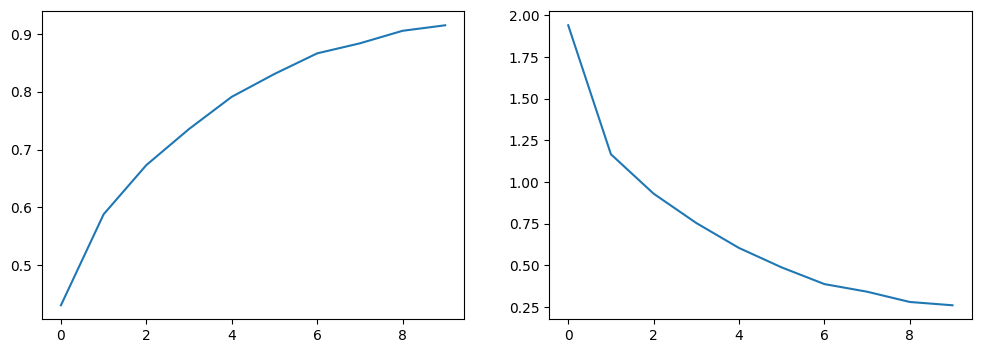

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])


# Dato de prueba

In [16]:
scores = model_vgg1.evaluate(test_images, test_labels)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5801 - loss: 2.5238
Test loss: 2.5396041870117188
Test accuracy: 0.5827999711036682


# Experimento 2. VGG2
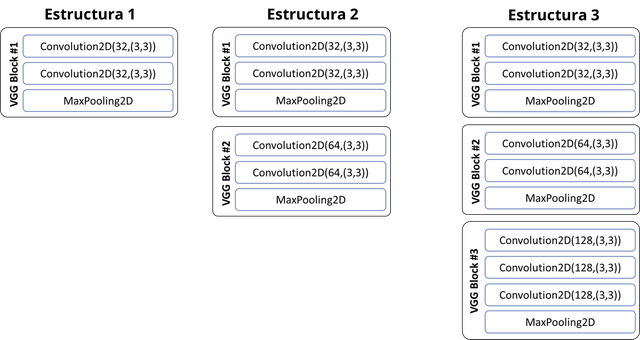

In [17]:
model_vgg2 = Sequential()
# numero de filtros y su dimension, activacion, padding=
model_vgg2.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model_vgg2.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2,2)))
# numero de filtros y su dimension, activacion, padding=
model_vgg2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vgg2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vgg2.add(MaxPooling2D(pool_size=(2,2)))
# en adelante montamos la RN
model_vgg2.add(Flatten())
model_vgg2.add(Dense(128, activation='relu'))
model_vgg2.add(Dense(10, activation='softmax'))


In [18]:
model_vgg2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_vgg2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

In [20]:
len(train_images)

50000

In [21]:
model_history2 = model_vgg2.fit(train_images, train_labels,
                               epochs=epochs,
                               batch_size=batch_size,
                               verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3631 - loss: 2.1487
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6086 - loss: 1.1108
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6822 - loss: 0.9006
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7296 - loss: 0.7676
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7745 - loss: 0.6406
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8079 - loss: 0.5482
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8402 - loss: 0.4531
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8629 - loss: 0.3997
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8843 - loss: 0.3338
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8954 - loss: 0.2995


In [28]:
import seaborn as sns
import sklearn

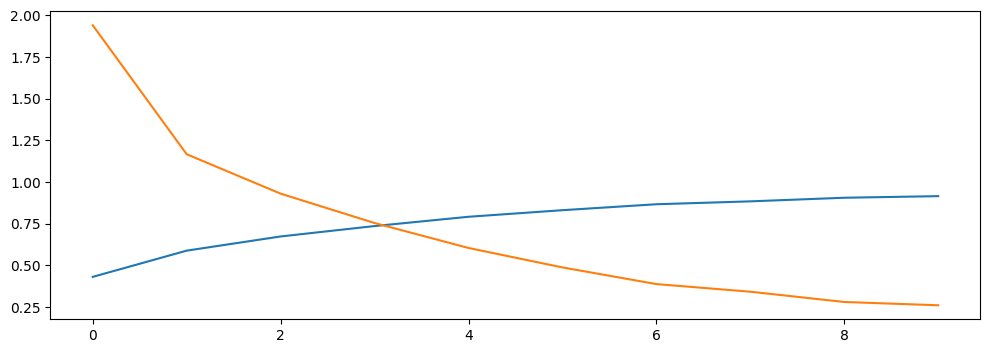

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])

In [23]:
scores = model_vgg2.evaluate(test_images, test_labels)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6582 - loss: 1.3975
Test loss: 1.4021506309509277
Test accuracy: 0.6626999974250793


In [24]:
pred_images = np.argmax(model_vgg2.predict(test_images), axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: >

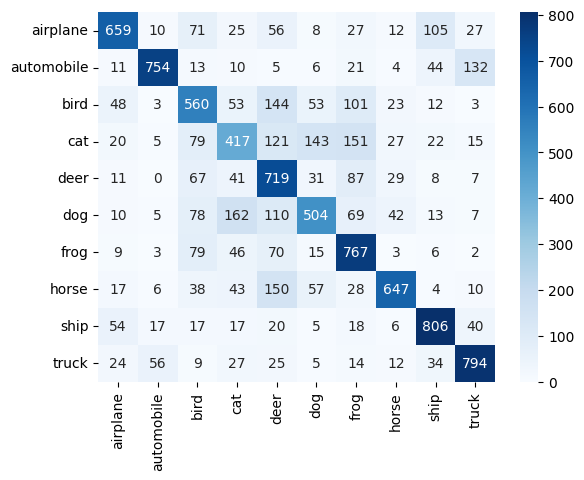

In [34]:
from sklearn.metrics import confusion_matrix
cf_model2 = confusion_matrix(y_true = test_labels, y_pred =pred_images)
sns.heatmap(cf_model2, annot=True, xticklabels=class_names, yticklabels=class_names,cmap='Blues', fmt='g')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

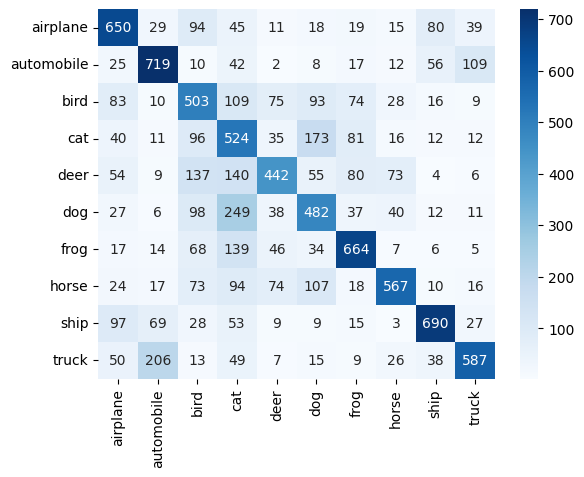

In [36]:
pred_images2 = np.argmax(model_vgg1.predict(test_images), axis =1)
cf_model1 = confusion_matrix(y_true = test_labels, y_pred =pred_images2)
sns.heatmap(cf_model1, annot=True, xticklabels=class_names, yticklabels=class_names,cmap='Blues', fmt='g')


# Modelo 3 VGG3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3345 - loss: 1.9481
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5998 - loss: 1.1372
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6808 - loss: 0.9206
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7185 - loss: 0.8043
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7448 - loss: 0.7376
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7675 - loss: 0.6732
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7789 - loss: 0.6379
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7888 - loss: 0.6049
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8058 - loss: 0.5584
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8173 - loss: 0.5309
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<Axes: >

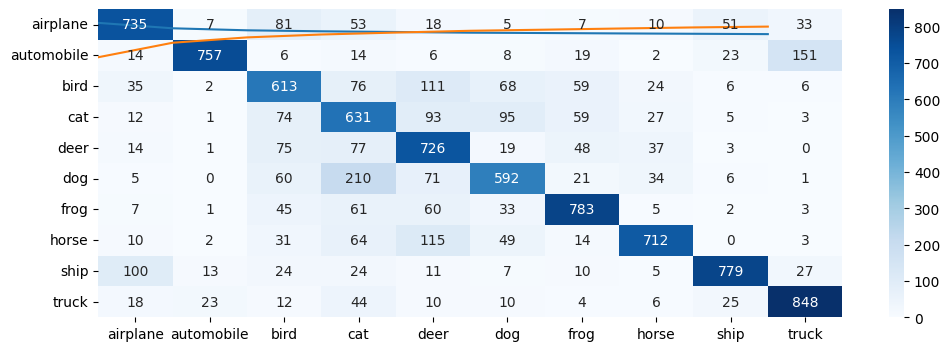

In [37]:
model_vgg3 = Sequential()
# numero de filtros y su dimension, activacion, padding=
model_vgg3.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model_vgg3.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vgg3.add(MaxPooling2D(pool_size=(2,2)))
# numero de filtros y su dimension, activacion, padding=
model_vgg3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vgg3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vgg3.add(MaxPooling2D(pool_size=(2,2)))

# numero de filtros y su dimension, activacion, padding=
model_vgg3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_vgg3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_vgg3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_vgg3.add(MaxPooling2D(pool_size=(2,2)))

# en adelante montamos la RN
model_vgg3.add(Flatten())
model_vgg3.add(Dense(128, activation='relu'))
model_vgg3.add(Dense(10, activation='softmax'))

model_vgg3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

model_history3 = model_vgg3.fit(train_images, train_labels,
                               epochs=epochs,
                               batch_size=batch_size,
                               verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: >

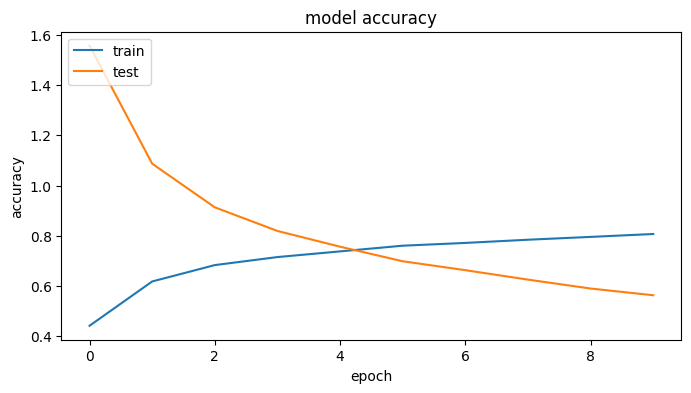

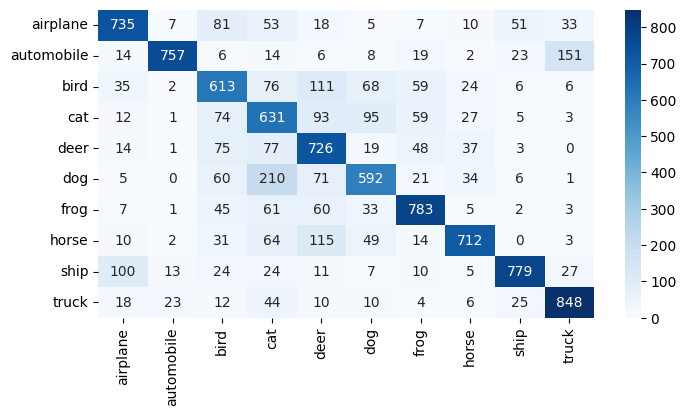

In [39]:
plt.figure(figsize=(8, 4))
plt.plot(model_history3.history['accuracy'])
plt.plot(model_history3.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure(figsize=(8, 4))
pred_images = np.argmax(model_vgg3.predict(test_images), axis =1)
cf_model3 = confusion_matrix(y_true = test_labels, y_pred =pred_images)
sns.heatmap(cf_model3, annot=True, xticklabels=class_names, yticklabels=class_names,cmap='Blues', fmt='g')

# Guardar el modelo

In [40]:
import os

In [41]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, 'model_vgg2.h5')

In [42]:
from keras.models import load_model
model_vgg3.save(os.path.join(save_dir, 'cifar10_vgg3.h5'))

In [43]:
model_load = load_model(os.path.join(save_dir, 'cifar10_vgg3.h5'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


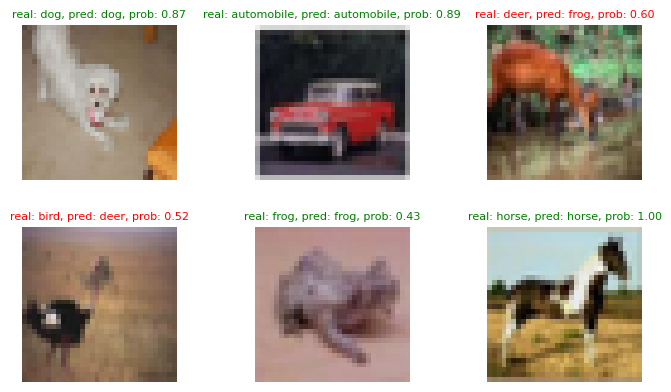

In [45]:
X_test = test_images
y_test = test_labels

test_index = np.random.randint(0, X_test.shape[0], size=6).tolist()
X_pred = X_test[test_index]
y_pred = model_load.predict(X_pred).round(2)
classes_pred = np.argmax(y_pred,axis=1)

n_rows = 2
n_cols = 3
plt.figure(figsize=(8, 5))
for row in range (n_rows):
  for col in range(n_cols):
    index = n_cols*row + col
    plt.subplot(n_rows, n_cols, index +1)
    plt.imshow(X_pred[index], cmap="binary", interpolation="nearest")
    plt.axis("off")
    real_class = class_names[y_test[test_index[index]][0]]
    pred_class = class_names[classes_pred[index]]
    # Change the color of text based on whether prediction is right or wrong
    if real_class == pred_class:
      title_color = "g"
    else:
      title_color = "r"
    plt.title(f"real: {real_class}, pred: {pred_class}, prob: {y_pred[index].max():.2f}", c=title_color,fontsize=8)
plt.subplots_adjust(wspace=0.5, hspace=0.1)
plt.show();